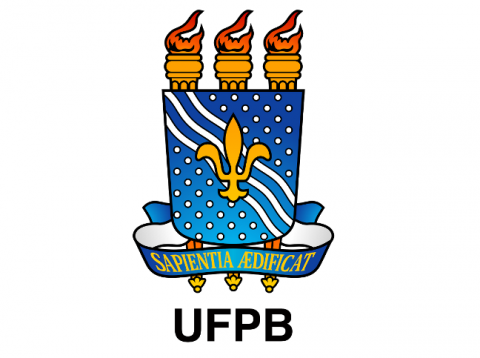
## UNIVERSIDADE FEDERAL DA PARAÍBA
### CENTRO DE TECNOLOGIA
### Programa de Pós-Graduação em Engenharia Civil e Ambiental (PPGECAM)
#### Disciplina: Linguagem de Programação (SECEA0052)
#### Semestre: 2022.1
#### Docente: Prof. Dr. Cristiano Das Neves Almeida


####                Raul Souza Muniz (20221012261)


### 1.	Leitura e pré-processamento dos dados:

In [1]:
%config Completer.use_jedi = False

In [2]:
# Importando das bibliotecas necessárias

import pandas as pd
import datetime as dt


In [3]:
# Lendo o arquivo a partir do diretório. O arquivo é armazenado como um dataframe
est37 = pd.read_csv('180801145837 Estacao id 112.dat', encoding='ISO-8859-1',header=None, skiprows=None)
est34 = pd.read_csv('190206100334 Estacao id 112.dat', encoding='ISO-8859-1',header=None, skiprows=None)

In [4]:
# Conferindo a leitura do arquivo 01
(est37)


,0,1,2,3,4,5,6,7,8,9
0,112,2017,243,23,15,0.745,28/08/17 15:25:50,1.544 m,Nível estático,0.700 m
1,112,2017,243,23,30,0.745,NaN,NaN,NaN,NaN
2,112,2017,243,23,45,0.750,NaN,NaN,NaN,NaN
3,112,2017,244,0,0,0.745,NaN,NaN,NaN,NaN
4,112,2017,244,0,15,0.750,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32121,112,2018,213,13,45,0.844,NaN,NaN,NaN,NaN
32122,112,2018,213,14,0,0.844,NaN,NaN,NaN,NaN
32123,112,2018,213,14,15,0.844,NaN,NaN,NaN,NaN
32124,112,2018,213,14,30,0.844,NaN,NaN,NaN,NaN


In [5]:
# Conferindo a leitura do arquivo 02

est34

,0,1,2,3,4,5,6,7,8,9
0,112,2018,67,18,15,1.101,09/10/17 13:18:11,1.308 m,Nível estático,0.910 m
1,112,2018,67,18,30,1.101,NaN,NaN,NaN,NaN
2,112,2018,67,18,45,1.101,NaN,NaN,NaN,NaN
3,112,2018,67,19,0,1.101,NaN,NaN,NaN,NaN
4,112,2018,67,19,15,1.101,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
32121,112,2019,37,8,45,1.956,NaN,NaN,NaN,NaN
32122,112,2019,37,9,0,1.956,NaN,NaN,NaN,NaN
32123,112,2019,37,9,15,1.956,NaN,NaN,NaN,NaN
32124,112,2019,37,9,30,1.962,NaN,NaN,NaN,NaN


In [6]:
# Unindo os dois dataframes
est37_34 = est37.append(est34, ignore_index=True)

# Removendo os dados duplicados
est37_34.drop_duplicates(inplace=True)

# Alterando o nome das colunas

est37_34.rename(columns={0:'Codigo', 1: 'Ano', 2: 'Dia_Juliano', 3: 'Hora', 4: 'Minutos', 5:'Nivel_Estatico', 6: 'Calibragem'}, inplace=True)

# Excluindo as colunas desnecessárias

est37_34.drop(columns=['Calibragem',7, 8, 9], inplace=True)

# Excluindo os anos de 2017 e 2019

filt37_34 = (est37_34['Ano'] == 2018)

est37_34 = est37_34.loc[filt37_34]
est37_34

# Colocando o sinal negativo no nível estático

est37_34[:]['Nivel_Estatico'] = est37_34['Nivel_Estatico'].apply(lambda x: x*-1)

# Unindo os dois dataframes e resetando os índices

est37_34.reset_index(inplace=True)
df = est37_34



In [7]:
df = df.reset_index().drop(columns = ['level_0','index'])
df



,Codigo,Ano,Dia_Juliano,Hora,Minutos,Nivel_Estatico
0,112,2018,1,0,0,-1.505
1,112,2018,1,0,15,-1.505
2,112,2018,1,0,30,-1.505
3,112,2018,1,0,45,-1.505
4,112,2018,1,1,0,-1.505
...,...,...,...,...,...,...
35035,112,2018,365,22,45,-1.900
35036,112,2018,365,23,0,-1.900
35037,112,2018,365,23,15,-1.905
35038,112,2018,365,23,30,-1.900


### 2.	Ajuste dos dados relativos à data e hora de observação (datetime)

In [8]:
# Transformação da data juliana em gregoriana a partir de uma origem fornecida

dataframe_data = pd.to_datetime(df['Dia_Juliano'], unit = 'D', origin = '2017-12-31')
dataframe_data

data_hora = pd.DataFrame({'Dia':dataframe_data, 'Hora': df['Hora'], 'Minuto':df['Minutos']})
data_final = data_hora['Dia'].astype(str) +' ' + df['Hora'].astype(str) + ':' + df['Minutos'].astype(str)
data_final = pd.to_datetime(data_final, format = "%Y%m%d %H:%M");
data_final


0       2018-01-01 00:00:00
1       2018-01-01 00:15:00
2       2018-01-01 00:30:00
3       2018-01-01 00:45:00
4       2018-01-01 01:00:00
                ...        
35035   2018-12-31 22:45:00
35036   2018-12-31 23:00:00
35037   2018-12-31 23:15:00
35038   2018-12-31 23:30:00
35039   2018-12-31 23:45:00
Length: 35040, dtype: datetime64[ns]

In [9]:
# Criando DataFrame Filtrado pelas colunas: Data e hora, Código do Piezômetro e Nível estático observado
df_final = pd.DataFrame({'Cód.Piezo': df['Codigo'],'Nivel_Estatico': df['Nivel_Estatico'], 'Data_e_Hora': data_final})

# Tornando a data e hora o índex do dataframe
df_final.set_index('Data_e_Hora', inplace = True)


## 3.	Visualização de dados

In [10]:
# Filtrando os dados para médias diárias e mensais
df_diario = df_final.resample('1D').mean()
df_mensal = df_final.resample('1M', label='right').mean()



In [11]:
# Função para retornar os resultados do método describe() a partir do repasse de uma série

def estat_descritiva(Nivel_Estatico):
    describe = pd.DataFrame.describe(Nivel_Estatico)
    estat_descritiva = pd.DataFrame(describe)
    return estat_descritiva

In [12]:
# Obtendo a os resultados do método describe() para as observações de 15 em 15 min (média, desv pad, mínimo, máximo, quartis) 

estat_descritiva(df_final['Nivel_Estatico'])

,Nivel_Estatico
count,35040.000000
mean,-1.161830
std,0.374446
min,-1.905000
25%,-1.460000
50%,-1.112000
75%,-0.855000
max,-0.438000


### Construção dos Gráficos de Linha, Histograma e BoxPlot para os dados analisados de 15 em 15 minutos

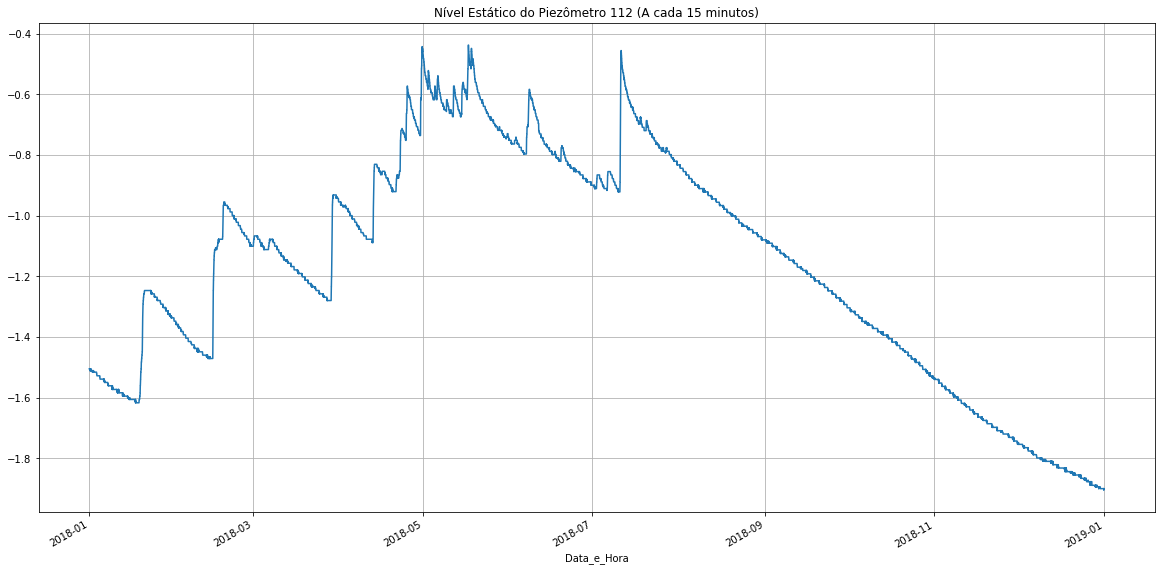

In [13]:
# Gráfico de Linha para os dados observados de 15 em 15 min

df_final['Nivel_Estatico'].plot.line(title='Nível Estático do Piezômetro 112 (A cada 15 minutos)', figsize=(20,10)).grid()


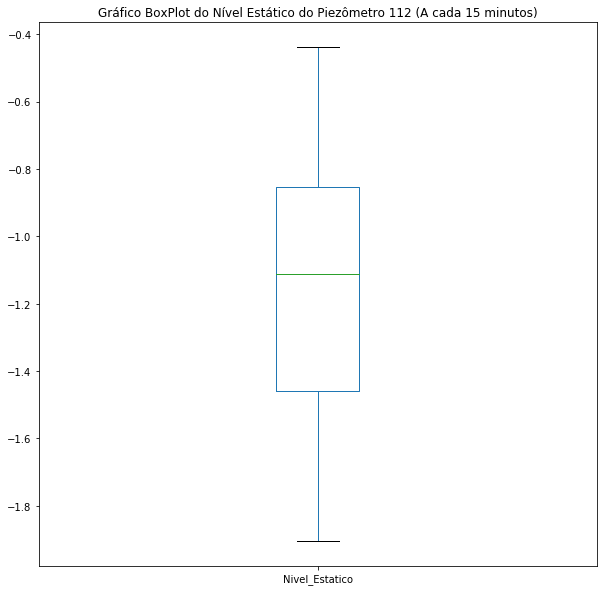

In [14]:
# Gráfico BoxPlot para os dados observados de 15 em 15 min

df_final['Nivel_Estatico'].plot.box(title='Gráfico BoxPlot do Nível Estático do Piezômetro 112 (A cada 15 minutos)', figsize=(10,10));

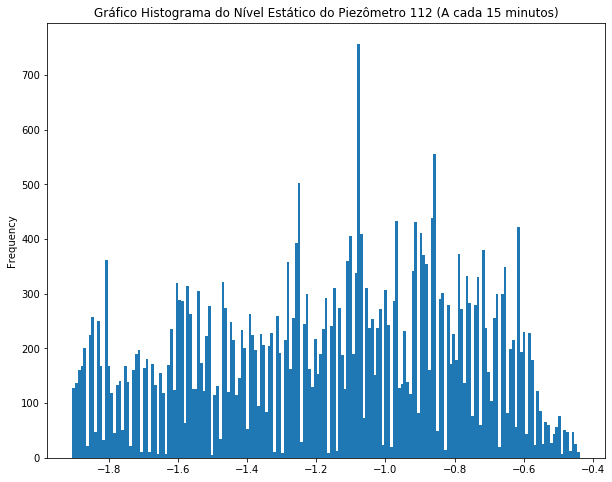

In [15]:
df_final['Nivel_Estatico'].plot.hist(title='Gráfico Histograma do Nível Estático do Piezômetro 112 (A cada 15 minutos)', figsize=(10,8), bins=187);

### Construção dos Gráficos de Linha, Histograma e BoxPlot para os dados analisados Diariamente

In [16]:
# Analisando os dados diários
df_diario

,Cód.Piezo,Nivel_Estatico
Data_e_Hora,,
2018-01-01,112,-1.508312
2018-01-02,112,-1.514281
2018-01-03,112,-1.519938
2018-01-04,112,-1.530208
2018-01-05,112,-1.539000
...,...,...
2018-12-27,112,-1.881750
2018-12-28,112,-1.889260
2018-12-29,112,-1.892490


In [17]:
# Aplicando a função de estatistica descritiva para os dados diários
estat_descritiva(df_diario['Nivel_Estatico'])

,Nivel_Estatico
count,365.000000
mean,-1.161816
std,0.374639
min,-1.900052
25%,-1.460000
50%,-1.111844
75%,-0.858552
max,-0.485344


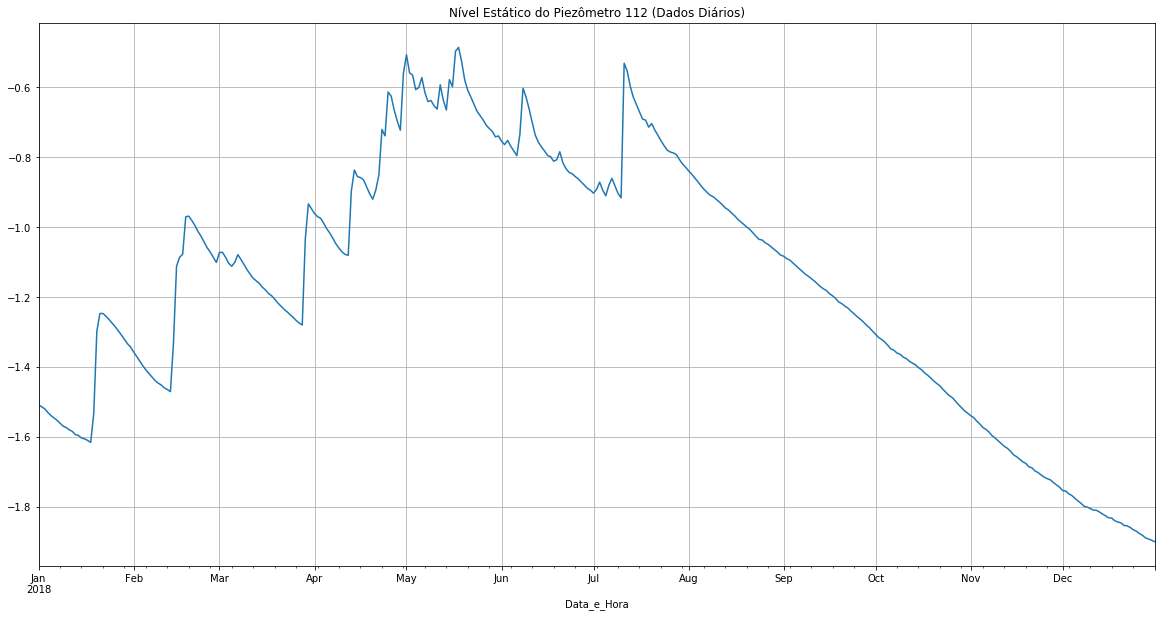

In [18]:
# Gráfico de Linha para os dados diários  

df_diario['Nivel_Estatico'].plot.line(title= 'Nível Estático do Piezômetro 112 (Dados Diários)' , figsize=(20,10)).grid()

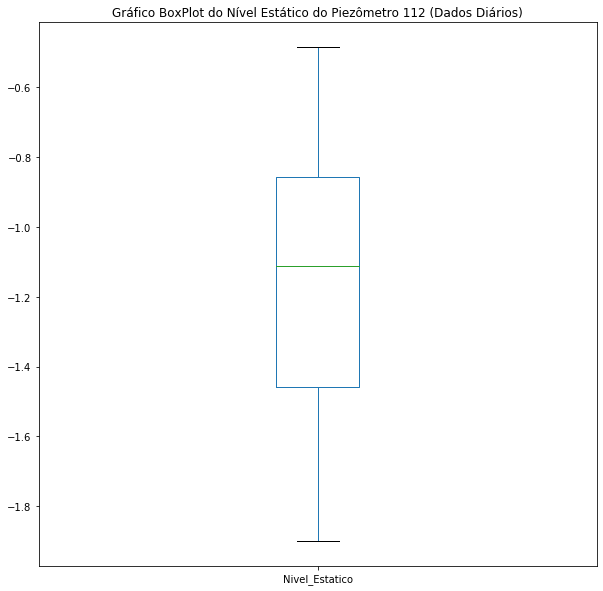

In [19]:
# Gráfico BoxPlot para os dados diários
df_diario['Nivel_Estatico'].plot.box(title='Gráfico BoxPlot do Nível Estático do Piezômetro 112 (Dados Diários)', figsize=(10,10));

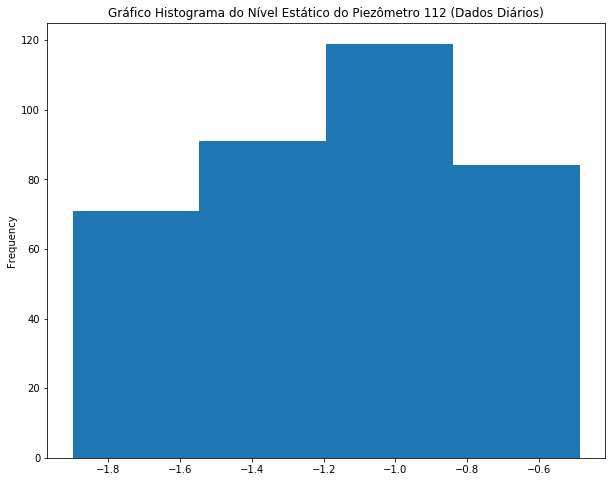

In [20]:
# Gráfico Histograma para os dados Diários
df_diario['Nivel_Estatico'].plot.hist(title='Gráfico Histograma do Nível Estático do Piezômetro 112 (Dados Diários)', figsize=(10,8), bins=4);

### Construção dos Gráficos de Linha, Histograma e BoxPlot para os dados analisados Mensalmente

In [21]:
# Analisando os dados Mensais
df_mensal

,Cód.Piezo,Nivel_Estatico
Data_e_Hora,,
2018-01-31,112,-1.458494
2018-02-28,112,-1.229159
2018-03-31,112,-1.149849
2018-04-30,112,-0.879653
2018-05-31,112,-0.623410
2018-06-30,112,-0.785455
2018-07-31,112,-0.771395
2018-08-31,112,-0.966187
2018-09-30,112,-1.187150


In [22]:
# Aplicando a função de estatistica descritiva para os dados diários
estat_descritiva(df_mensal['Nivel_Estatico'])

,Nivel_Estatico
count,12.000000
mean,-1.161964
std,0.374383
min,-1.829470
25%,-1.425815
50%,-1.168499
75%,-0.856103
max,-0.623410


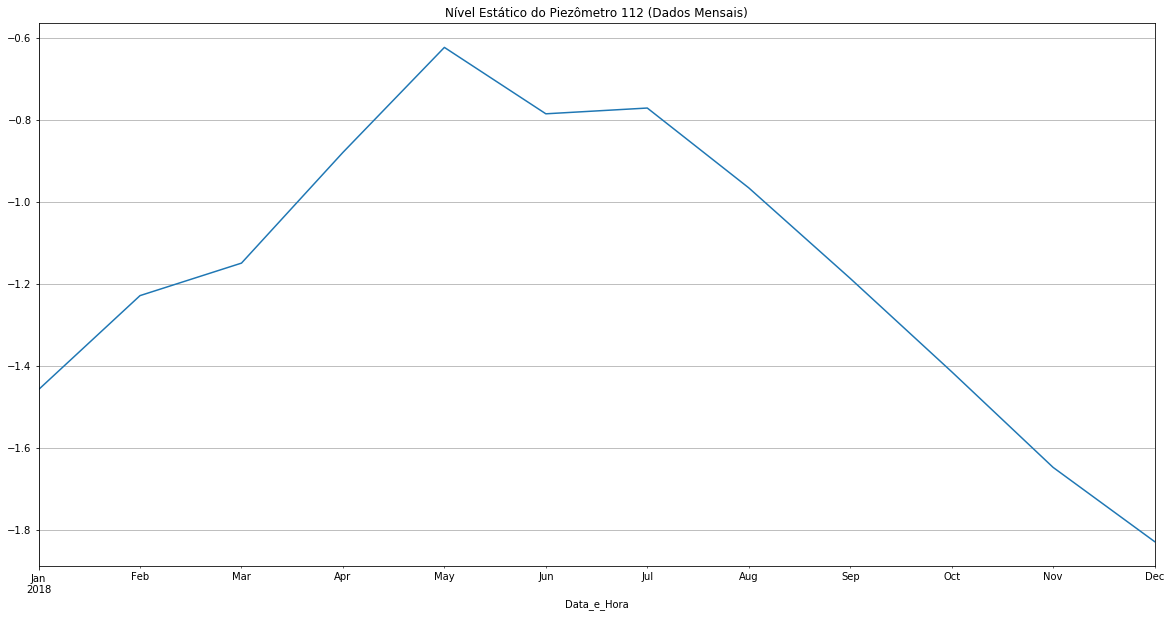

In [23]:
# Gráficos de Linha para os dados mensais de Nível estático 

df_mensal['Nivel_Estatico'].plot.line(title='Nível Estático do Piezômetro 112 (Dados Mensais)', figsize=(20,10)).grid()

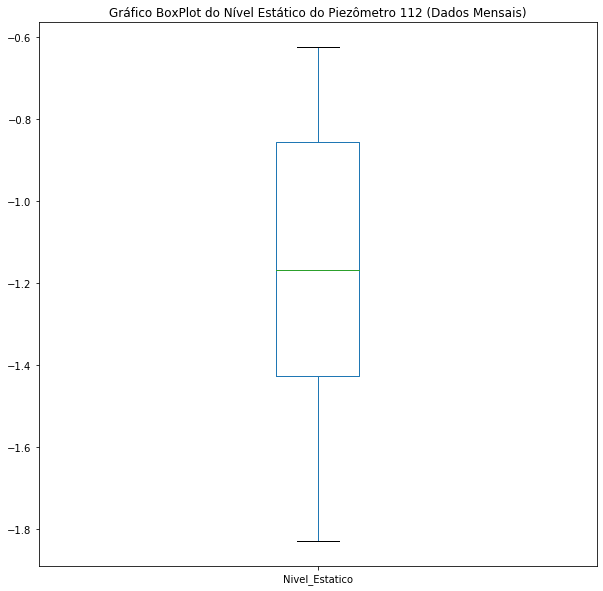

In [24]:
# Gráfico Box Plot para os dados mensais de Nível Estático
df_mensal['Nivel_Estatico'].plot.box(title='Gráfico BoxPlot do Nível Estático do Piezômetro 112 (Dados Mensais)', figsize=(10,10));

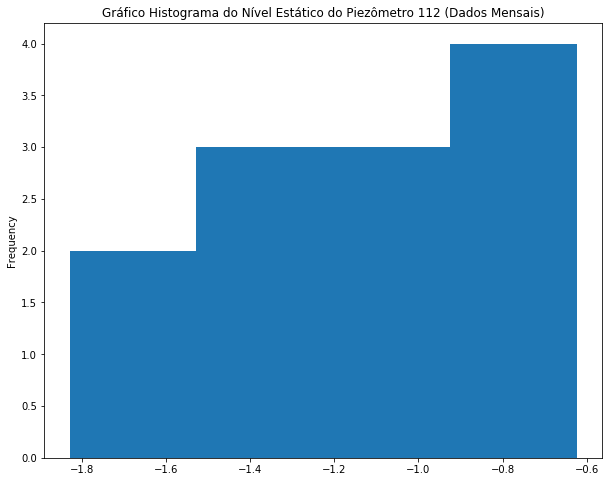

In [25]:
# Gráfico Histograma para os dados mensais de Nível Estático

df_mensal['Nivel_Estatico'].plot.hist(title='Gráfico Histograma do Nível Estático do Piezômetro 112 (Dados Mensais)', figsize=(10,8), bins=4);